In [2]:
#Import libraries
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn import metrics



In [3]:
#Read data into dataframes and define column names
train_df = pd.read_csv('1_TrainingSet_2Class.csv',names=['label','user_id','text']);
test_df = pd.read_csv('test_output.csv');
test_df.dropna()

,label,id,text,coordinates
16,1,1.270000e+18,Good day to jam up with VIBELORD ep. #stream #...,"{'type': 'Point', 'coordinates': [-1.50304722,..."
581,0,1.270000e+18,Avocado love for breakfast.\n\n#Travel #foodpo...,"{'type': 'Point', 'coordinates': [103.30808334..."
1836,0,1.270000e+18,Exactly! Why do receivers accept the jam why ...,"{'type': 'Point', 'coordinates': [-117.1585, 3..."


In [4]:
# Define training and testing data
train_x = train_df['text']; 
train_y = train_df['label'];

test_x = test_df['text'];
test_y = test_df['label'];



In [5]:
print("Length of train data")
print(len(train_x), len(train_y))

print("Length of test data")
print(len(test_x), len(test_y))

Length of train data
40879 40879
Length of test data
2028 2028


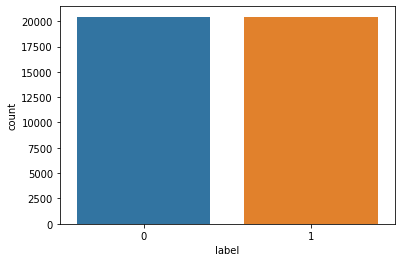

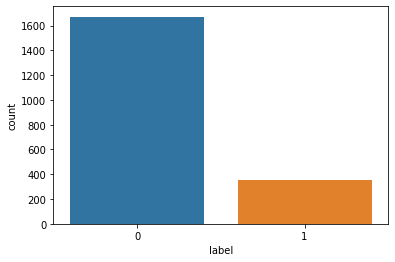

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(train_df['label'],label="label")
plt.show()
sns.countplot(test_df['label'],label="label")
plt.show()

In [6]:
#  Word Vectorization
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(train_x)
Train_X_Tfidf = Tfidf_vect.transform(train_x)
Test_X_Tfidf = Tfidf_vect.transform(test_x)


In [7]:
# vocabulary that it has learned from the corpus
print(Tfidf_vect.vocabulary_)

{'disabled': 1402, 'vehicle': 4712, 'on': 3200, 'westbound': 4840, 'highway': 2169, 'wb': 4810, 'at': 519, 'drive': 1475, 'use': 4685, 'caution': 897, 'when': 4853, 'traveling': 4553, 'through': 4459, 'this': 4442, 'area': 481, 'new': 3070, 'teacher': 4383, 'lunch': 2738, 'amp': 427, 'training': 4539, 'marker': 2791, 'and': 431, 'the': 4427, 'spot': 4181, 'in': 2331, 'our': 3245, 'uhaultrends': 4624, 'canadian': 851, 'destination': 1364, 'countdown': 1184, 'is': 2413, 'toronto': 4508, 'ontario': 3209, 'years': 4972, 'ago': 361, 'today': 4487, 'mlk': 2924, 'gave': 1957, 'his': 2179, 'historic': 2180, 'have': 2111, 'dream': 1467, 'speech': 4166, 'it': 2420, 'always': 413, 'hard': 2093, 'to': 4485, 'say': 3905, 'what': 4848, 'been': 640, 'your': 4985, 'favorite': 1746, 'memory': 2844, 'with': 4908, 'elizabeth': 1558, 'do': 1430, 'not': 3129, 'pay': 3331, 'north': 3120, 'korea': 2542, 'another': 444, 'single': 4077, 'america': 419, 'talking': 4366, 'selling': 3965, 'congrats': 1124, 'for':

In [8]:
# Naive Bayes classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,train_y)

# predict the labels on validation dataset
ypred_NB = Naive.predict(Test_X_Tfidf)


In [9]:
from sklearn.metrics import classification_report
# Use accuracy_score function to get the accuracy

print("Naive Bayes Accuracy Score -> ",accuracy_score(ypred_NB, test_y)*100)
print("Naive Bayes Performance -> \n",classification_report(test_y, ypred_NB))

Naive Bayes Accuracy Score ->  75.54240631163708
Naive Bayes Performance -> 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1672
           1       0.24      0.18      0.21       356

    accuracy                           0.76      2028
   macro avg       0.54      0.53      0.53      2028
weighted avg       0.73      0.76      0.74      2028



In [10]:
#confusion matrix for  naive bayes
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_y, ypred_NB)) 

[[1467  205]
 [ 291   65]]


In [11]:
# Classifier - Algorithm - SVM
from sklearn.svm import SVC
svclassifier=SVC(kernel='linear')
svclassifier.fit(Train_X_Tfidf,train_y)

# predict the labels on validation dataset
predictions_SVM = svclassifier.predict(Test_X_Tfidf)

In [12]:
from sklearn.metrics import classification_report
# Use accuracy_score function to get the accuracy

print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, test_y)*100)
print("SVM Performance -> \n",classification_report(test_y,predictions_SVM ))


SVM Accuracy Score ->  83.28402366863905
SVM Performance -> 
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      1672
           1       0.52      0.59      0.55       356

    accuracy                           0.83      2028
   macro avg       0.72      0.74      0.73      2028
weighted avg       0.84      0.83      0.84      2028



In [13]:
#confusion matrix for  SVC
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_y, predictions_SVM)) 

[[1479  193]
 [ 146  210]]


In [14]:
#logistic regression classifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

logreg = LogisticRegression()
logreg.fit(Train_X_Tfidf, train_y)

# predict the labels on validation dataset
y_pred=logreg.predict(Test_X_Tfidf)


In [15]:
from sklearn.metrics import classification_report
print("LogisticRegression Accuracy Score -> ",accuracy_score(y_pred, test_y)*100)
print("LogisticRegression Performance -> \n",classification_report(test_y,y_pred))


LogisticRegression Accuracy Score ->  78.4516765285996
LogisticRegression Performance -> 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1672
           1       0.34      0.25      0.29       356

    accuracy                           0.78      2028
   macro avg       0.60      0.57      0.58      2028
weighted avg       0.76      0.78      0.77      2028



In [16]:
#confusion matrix for  Logistic regression
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_y, predictions_SVM)) 

[[1479  193]
 [ 146  210]]


In [17]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(Train_X_Tfidf, train_y)

# predict the labels on validation dataset
y_predic = classifier.predict(Test_X_Tfidf)

print("KNN Accuracy Score -> ",metrics.accuracy_score(test_y, y_predic)*100)
print("KNN Performance -> \n",classification_report(test_y,y_predic))


KNN Accuracy Score ->  70.41420118343196
KNN Performance -> 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1672
           1       0.12      0.11      0.12       356

    accuracy                           0.70      2028
   macro avg       0.47      0.47      0.47      2028
weighted avg       0.69      0.70      0.70      2028



In [18]:
#confusion matrix for  KNN classifier
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_y, predictions_SVM)) 

[[1479  193]
 [ 146  210]]
